Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline

Cargamos los datasets de train y test

In [2]:
df_train = pd.read_csv('ChallengeFiles\\TrainMyriad.csv')
df_test = pd.read_csv('ChallengeFiles\\TestMyriad.csv')

Obtenemos el shuffled train dataset y le separamos en X_train (features dataset) e y_train (classes dataset)

In [3]:
df_train = shuffle(df_train)#, random_state=0)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = shuffle(df_test)

In [4]:
# window = 5
# X_train = X_train.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]
# df_test = df_test.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]

Generamos algunas visualizaciones del training dataset

In [5]:
from utils.visualization import visualization
viz = visualization(X_train, y_train)

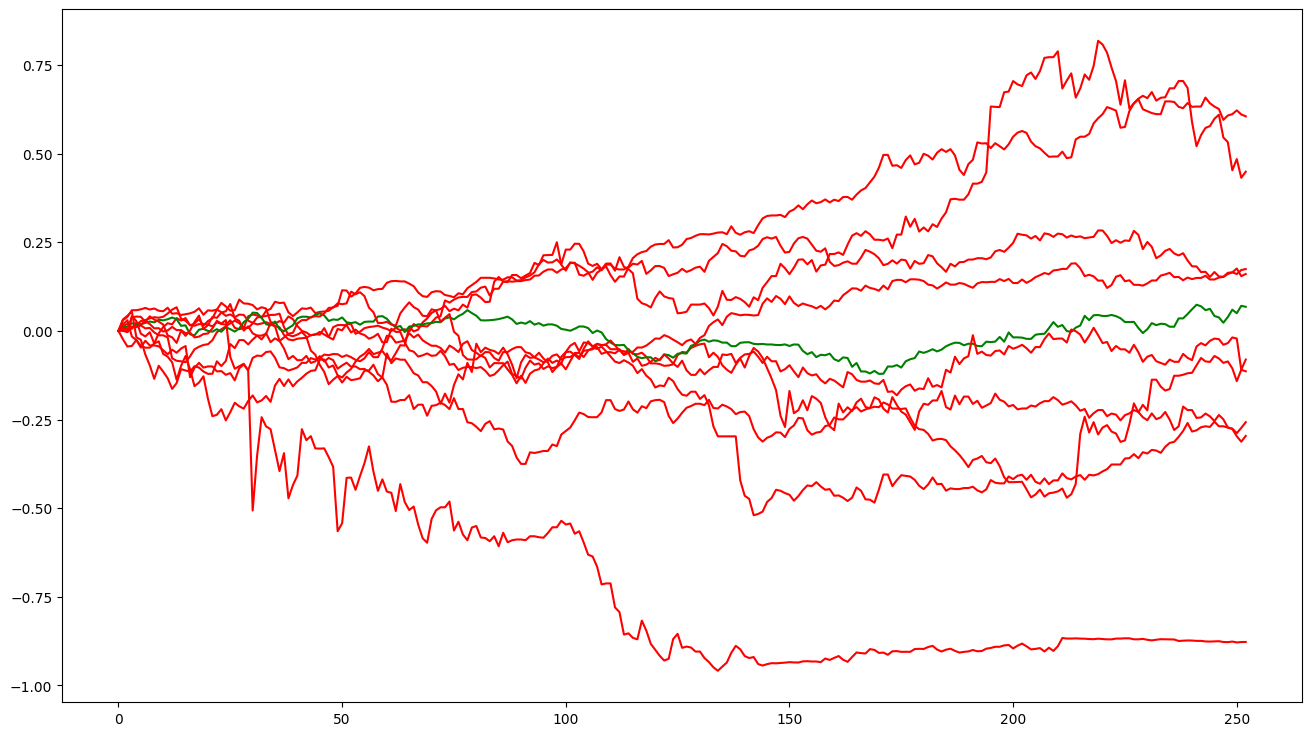

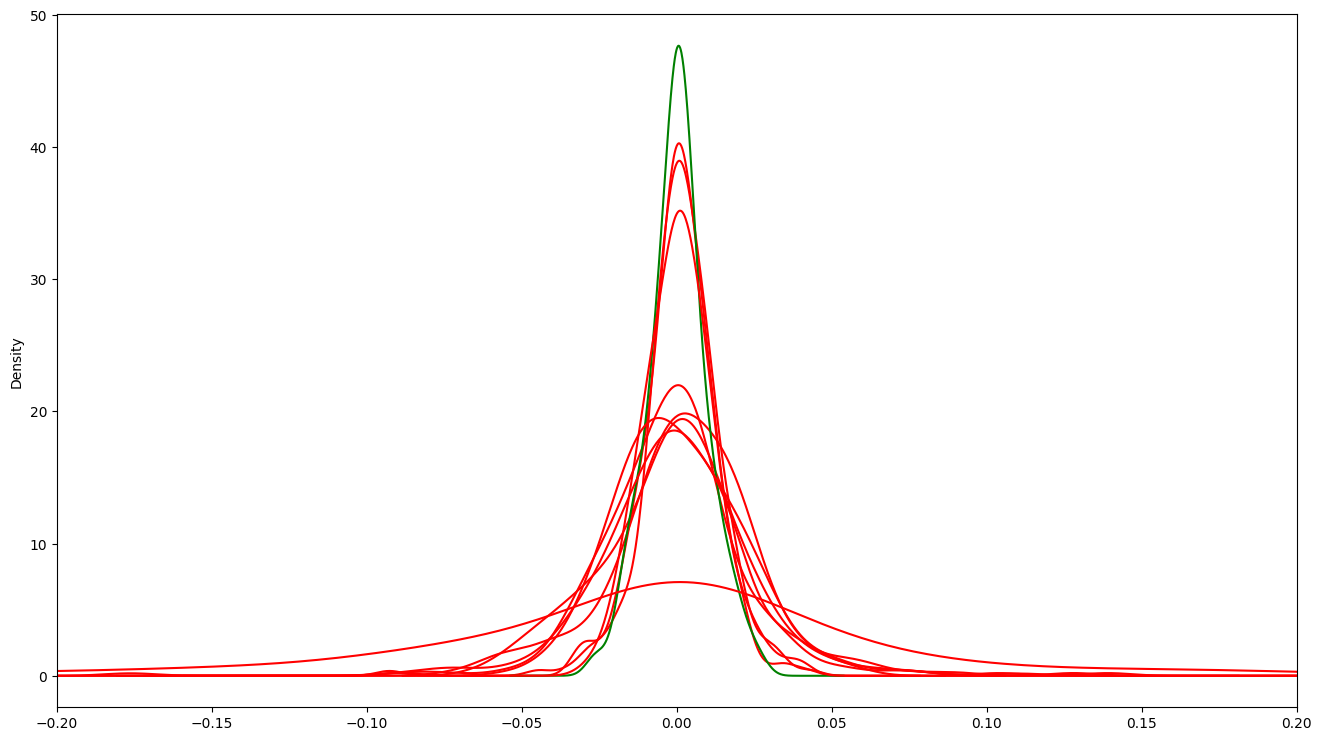

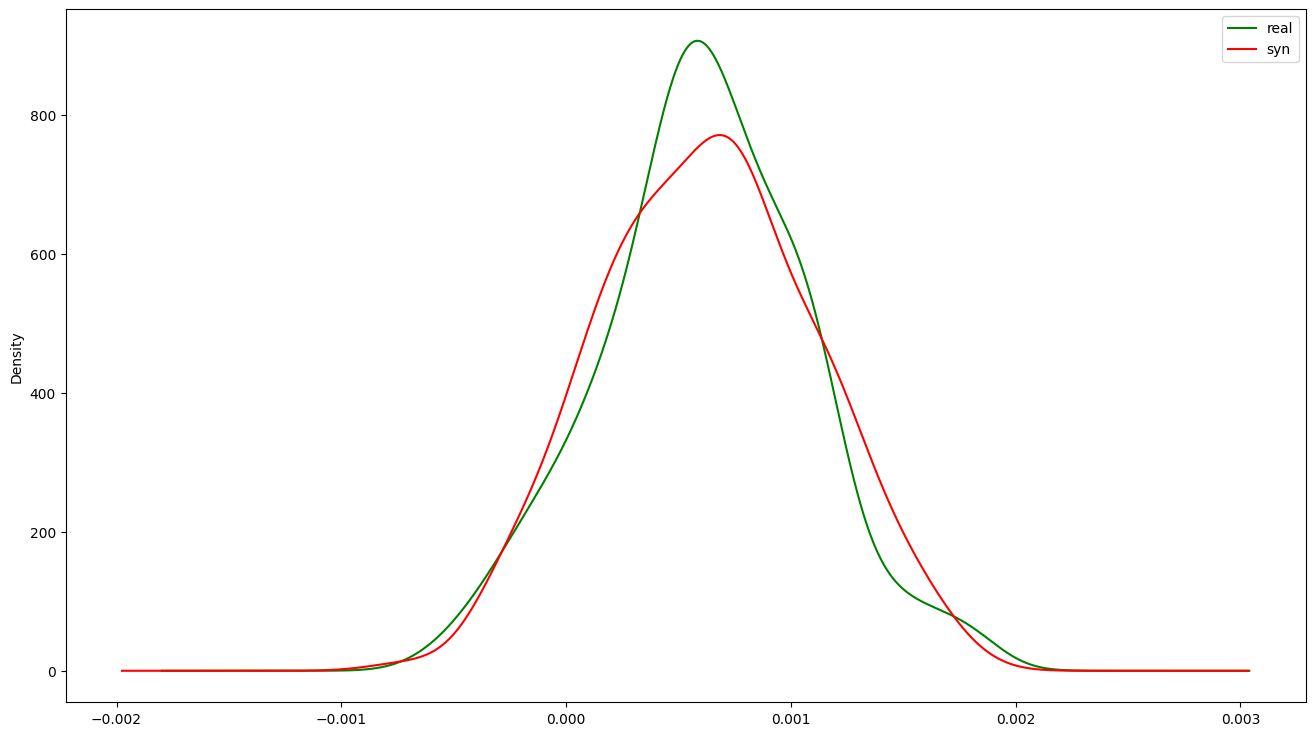

In [6]:
viz.plot_series()
viz.plot_density()
viz.plot_mean_density()

Importamos la clase modeling para estudiar el AUC en el entrenamiento de los modelos

In [7]:
from utils.sklearn_modeling import sklearn_modeling
from utils.tensorflow_modeling import tensorflow_modeling

Importamos los modelos

In [8]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Estudiamos los mismos

Mean AUC training sub-training set cross-validation score: 0.51
[0.5118364  0.51721716 0.49291058 0.50340586 0.50700774]
AUC training sub-testing set score: 0.52


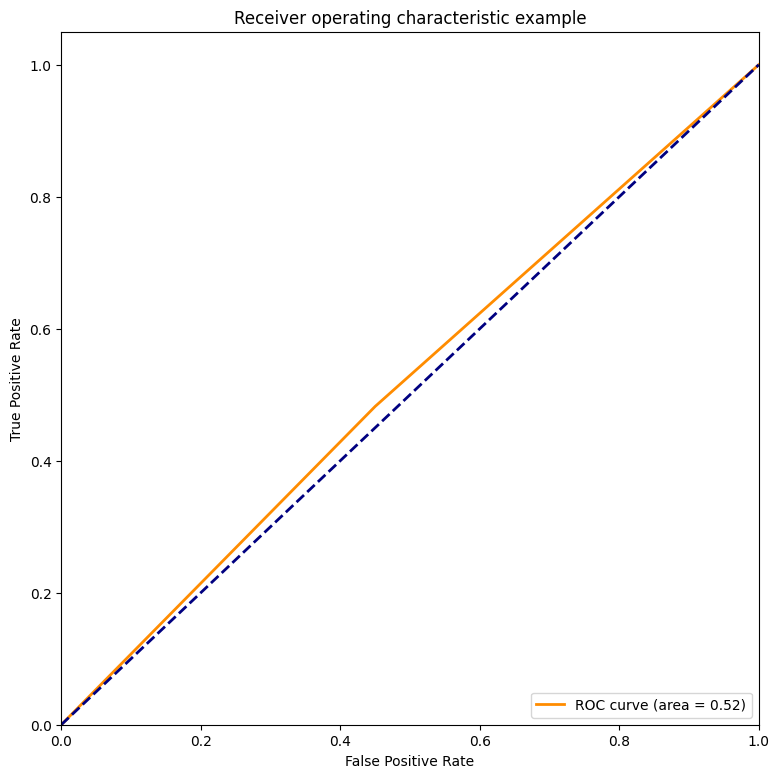

In [9]:
model_xg = sklearn_modeling(xgb.XGBClassifier(max_depth=10, eval_metric='error'), X_train, y_train, df_test)
model_xg.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.48920511 0.5060113  0.5222892  0.52728773 0.50834722]
AUC training sub-testing set score: 0.52


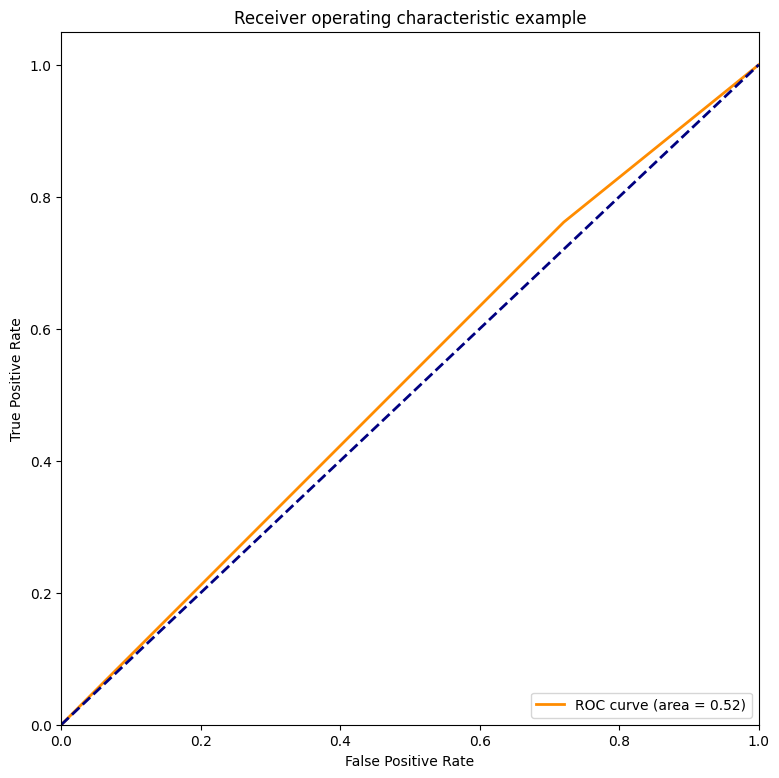

In [10]:
model_knn = sklearn_modeling(KNeighborsClassifier(3), X_train, y_train, df_test)
model_knn.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.52488993 0.51575517 0.49915058 0.50528439 0.48631938]
AUC training sub-testing set score: 0.53


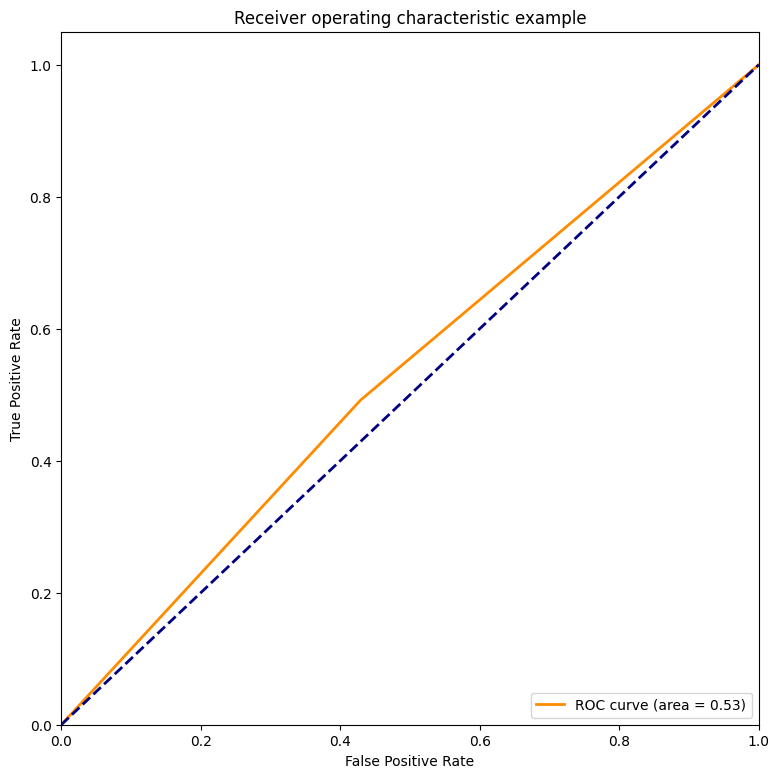

In [11]:
model_svc = sklearn_modeling(SVC(), X_train, y_train, df_test)
model_svc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.52642564 0.5        0.5        0.52432291 0.50084942]
AUC training sub-testing set score: 0.49


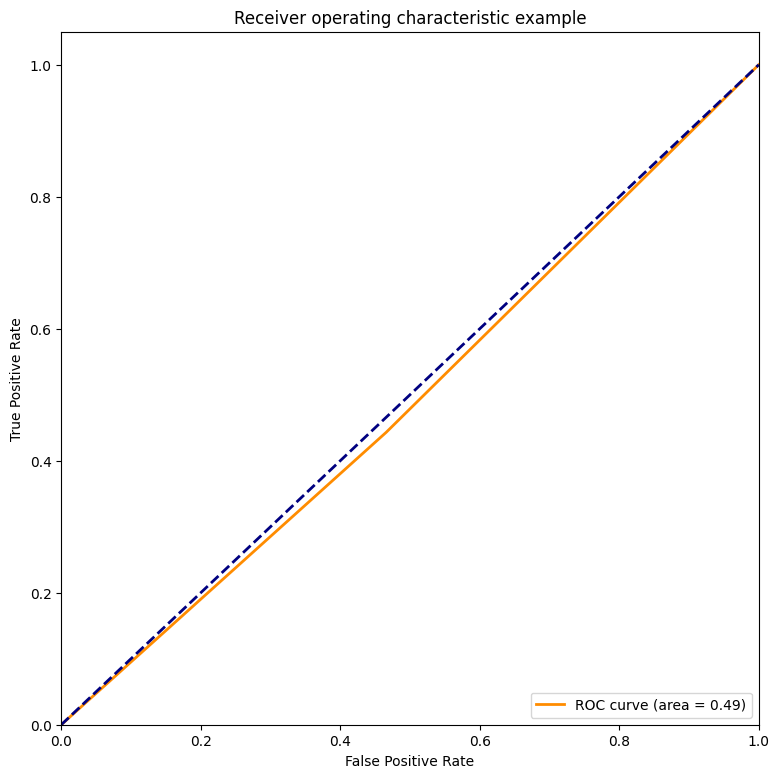

In [12]:
model_gp = sklearn_modeling(GaussianProcessClassifier(DotProduct()*Matern()), X_train, y_train, df_test)
model_gp.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.52
[0.48389956 0.5226404  0.52411056 0.54017609 0.50521089]
AUC training sub-testing set score: 0.49


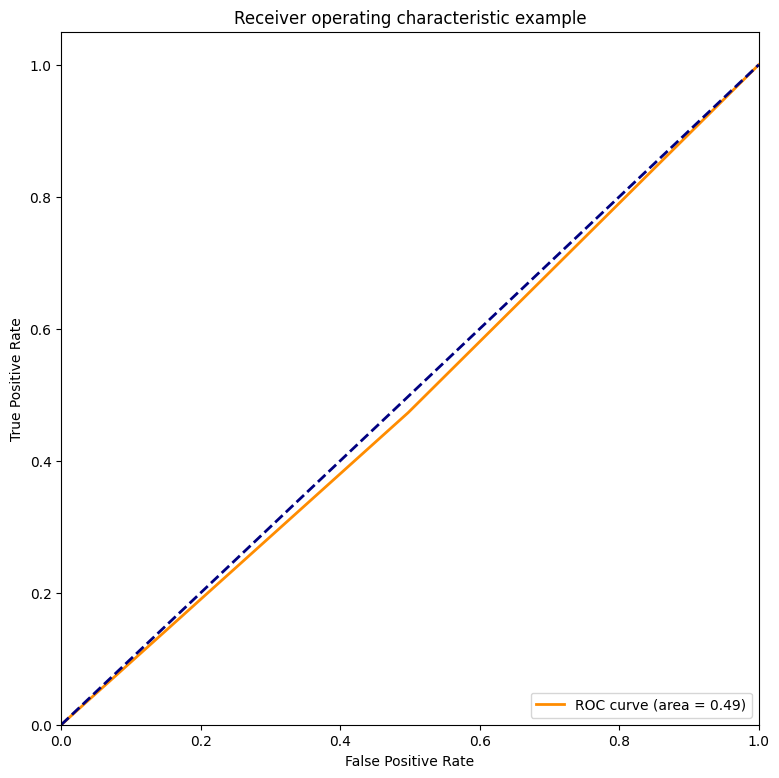

In [13]:
model_dt = sklearn_modeling(DecisionTreeClassifier(max_depth=10), X_train, y_train, df_test)
model_dt.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.52759784 0.51477507 0.52036166 0.4707194  0.49160378]
AUC training sub-testing set score: 0.53


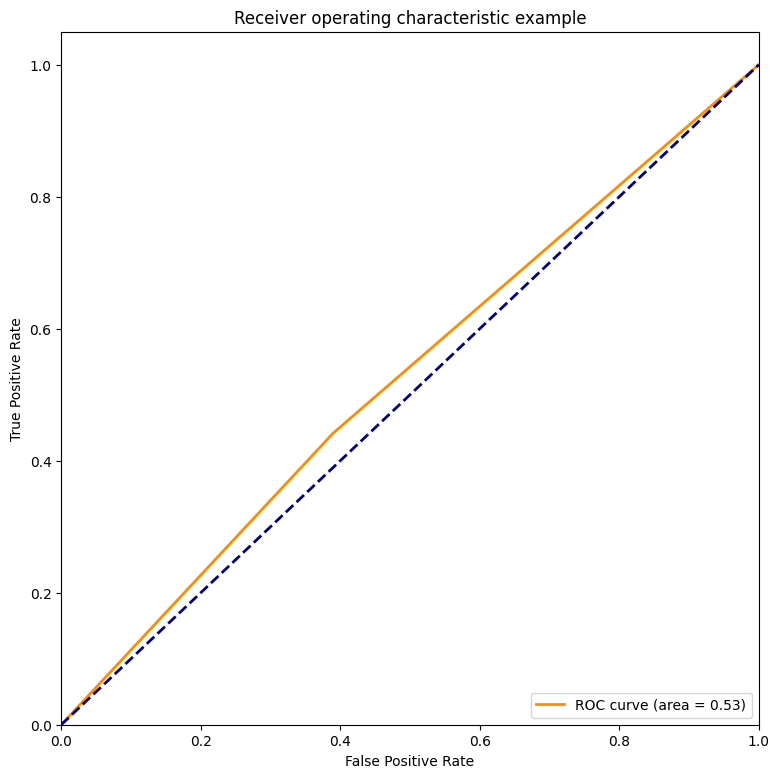

In [14]:
model_rf = sklearn_modeling(RandomForestClassifier(max_depth=10), X_train, y_train, df_test)
model_rf.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.50
[0.51858372 0.47970368 0.49395603 0.5062645  0.51224313]
AUC training sub-testing set score: 0.52


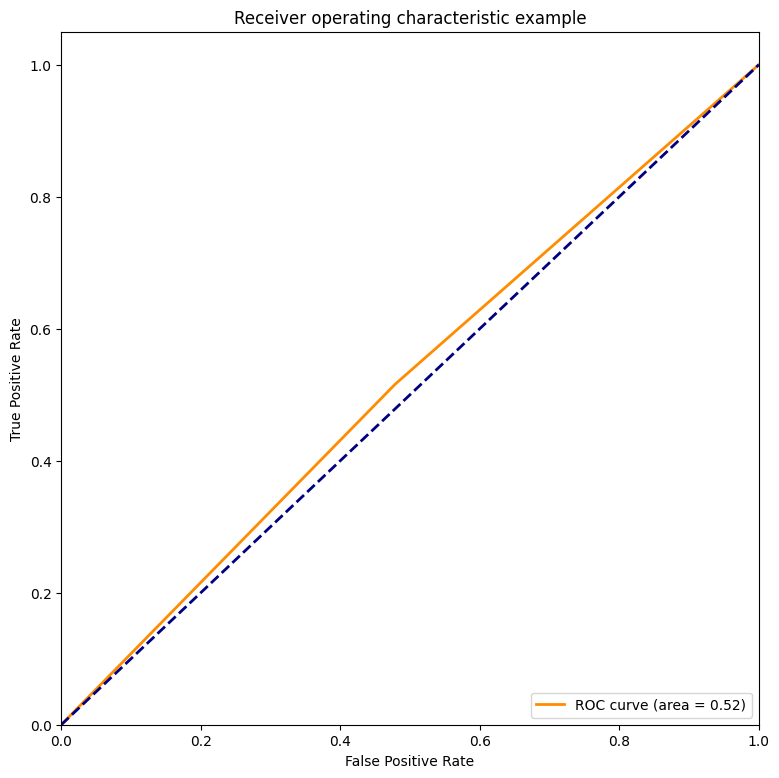

In [15]:
model_mlpc = sklearn_modeling(MLPClassifier(), X_train, y_train, df_test)
model_mlpc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.49
[0.4916067  0.4927554  0.48326473 0.49755791 0.50685256]
AUC training sub-testing set score: 0.50


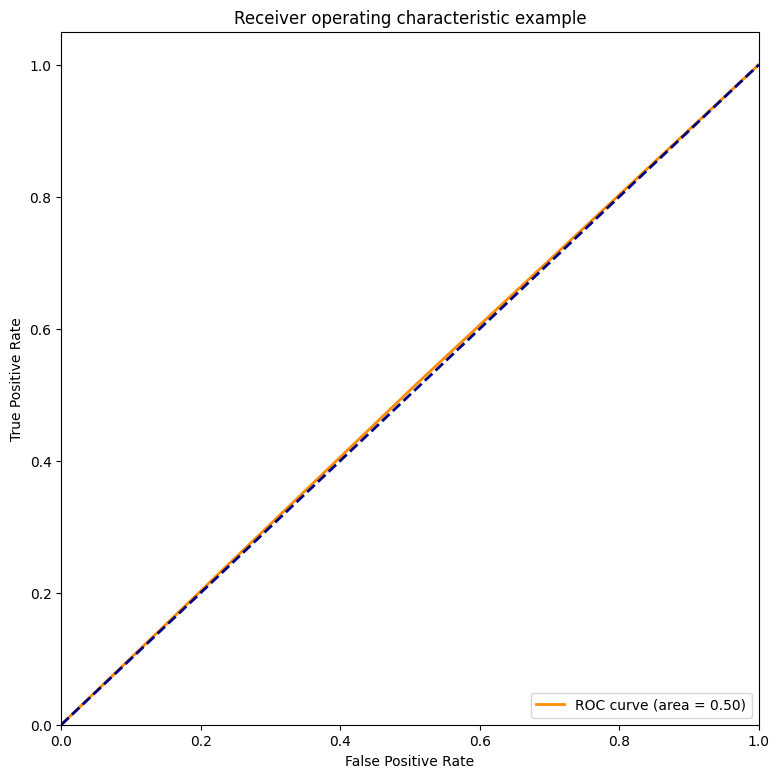

In [16]:
model_ada = sklearn_modeling(AdaBoostClassifier(), X_train, y_train, df_test)
model_ada.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.52
[0.49895441 0.54671012 0.51367245 0.5354961  0.52637296]
AUC training sub-testing set score: 0.52


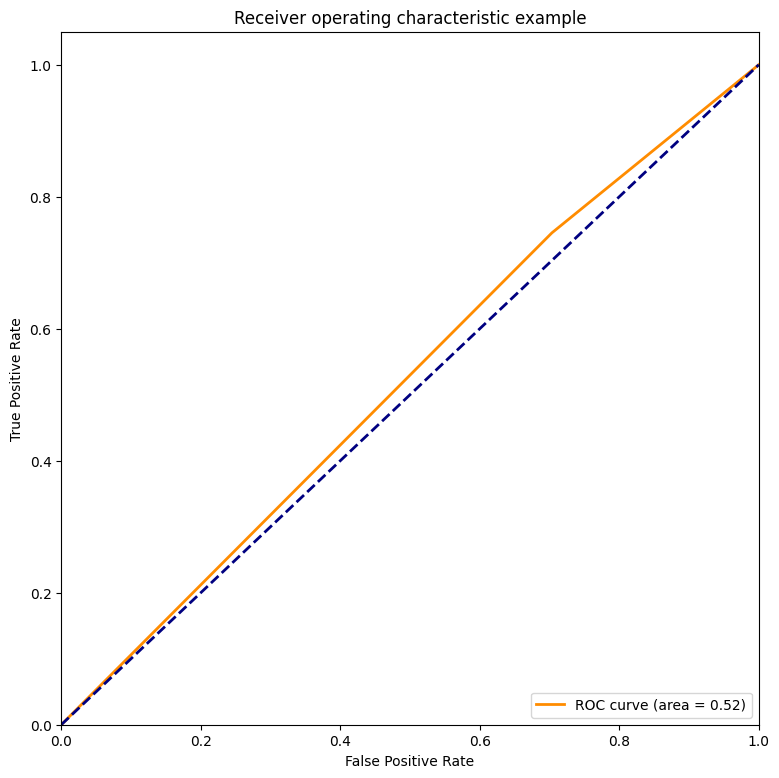

In [17]:
model_gnb = sklearn_modeling(GaussianNB(), X_train, y_train, df_test)
model_gnb.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.52093221 0.55656016 0.52605443 0.51909569 0.53303767]
AUC training sub-testing set score: 0.53


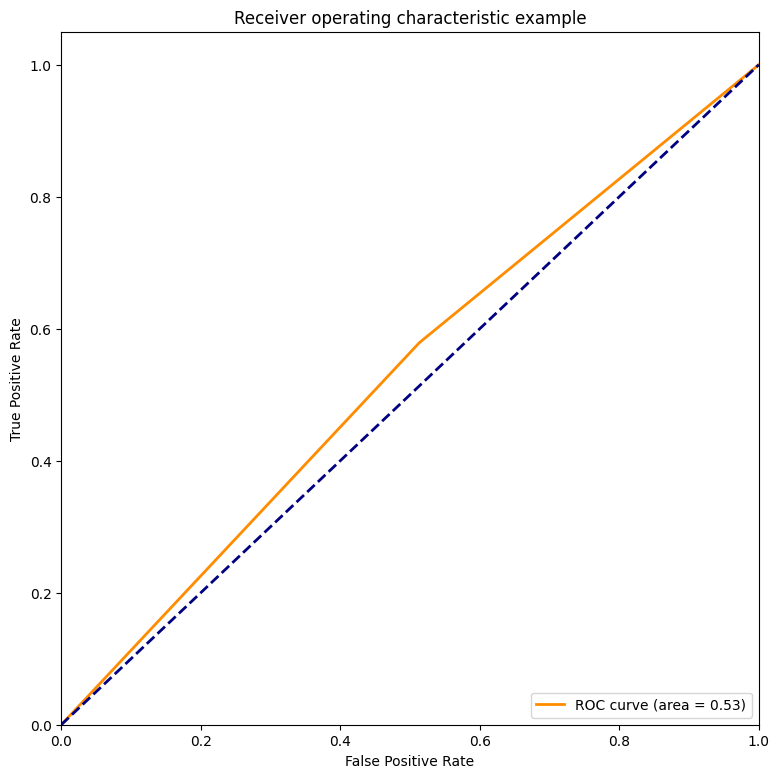

In [18]:
model_qda = sklearn_modeling(QuadraticDiscriminantAnalysis(), X_train, y_train, df_test)
model_qda.cv(cv_train=True)

AUC training sub-testing set score: 0.50


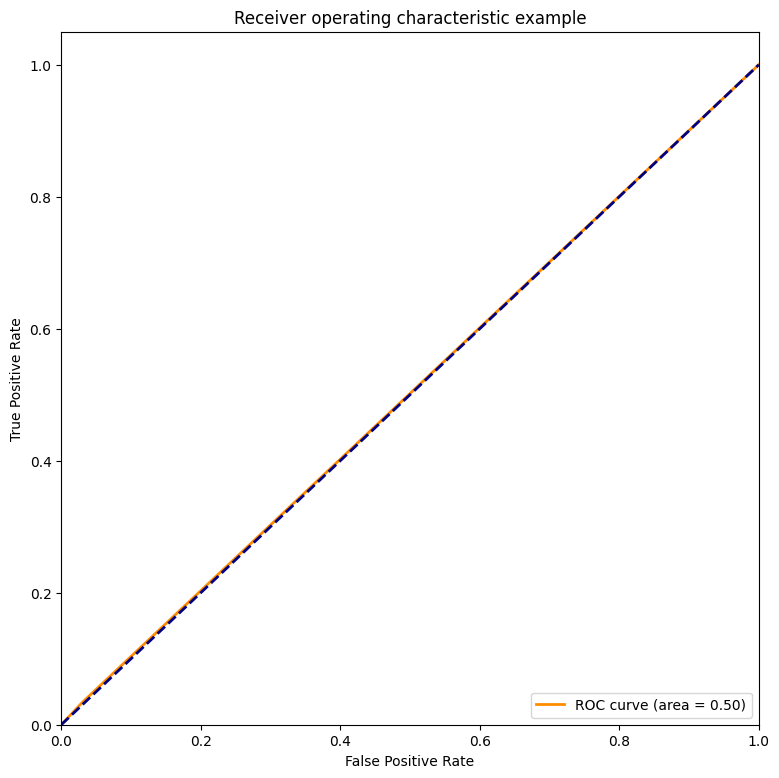

In [19]:
model_tf = tensorflow_modeling(X_train, y_train, X_test)
model_tf.cv(verbose=False, plot_train_val=False)